# Generalized Least Squares

## 1. The basis of generalized least squares

Generalized least squares is a math optiaml technics, it can find the best functional match for a set of data by minimizing the sum of squares of errors.  Generalized Least Squares are usually used in  curve fitting, model solving. Many other optimization problem can be represented in generalized least squares by minimizing energy or maximum entropy.
The general form of generalized least squares is：
$$
L = \sum (V_{obv} - V_{target}(\theta))^2
$$
Among them $V_{obv}$ is the multiple sample values, $V_{target}$ is the output values that we assume to fit the function, $\theta$ is the parameter that consturcted the model. $L$ is target function, if the $L$ descrease to minimum by adjusting model parameter $\theta$, fitting function is most close to observation, which means that we found the optimal model.


### 1.1 Demo

Assume we have the following observation data, we hope to find their inner rules.


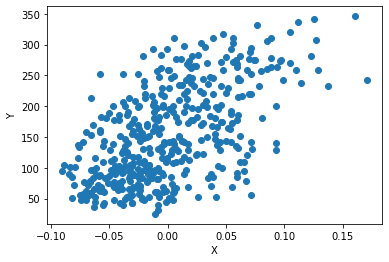

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets

# load data
d = datasets.load_diabetes()
X = d.data[:, 2]
Y = d.target

# draw original data
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### 1.2 Math principle
There are $N$ observation data：
$$
\mathbf{X} = \{x_1, x_2, ..., x_N \} \\
\mathbf{Y} = \{y_1, y_2, ..., y_N \}
$$
Among them $\mathbf{X}$ is the independent variable，$\mathbf{Y}$is the dependent variable。

We hope that we can find a model to explain these data, assuming that we can use the most simple linear model to fit data:
$$
y = ax + b
$$
Then the problem will be transfer to solve parameter $a$, $b$ can make the output of the model have relatively small error with the observation data as far as possible

How to construct function to evaluate the error between model output and observation data is a key problem, here we use the sum suqare between observation data and model output as the evaluate funciton(also called Loss function)

$$
L = \sum_{i=1}^{N} (y_i - a x_i - b)^2 \\
L = \sum_{i=1}^{N} \{y_i - (a x_i + b)\}^2
$$

To minimize loss function, we can get the parameter of model:
$$
\frac{\partial L}{\partial a} = -2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i \\
\frac{\partial L}{\partial b} = -2 \sum_{i=1}^{N} (y_i - a x_i - b)
$$
When the partial derivative is 0, the error function is the minimum, so we can get:
$$
-2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i = 0 \\
-2 \sum_{i=1}^{N} (y_i - a x_i - b) = 0 \\
$$
Adjust the order of upper formula we can get:
$$
a \sum x_i^2 + b \sum x_i = \sum y_i x_i \\
a \sum x_i + b N = \sum y_i
$$\
By solving two dimensional system of first order equations, we can get the optimal parameter for the model.

### 1.3 Program solving

a = 949.435260, b = 152.133484


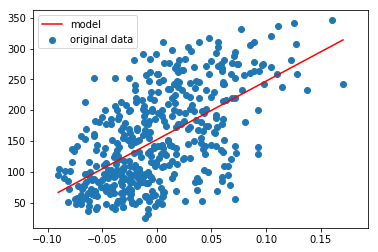

In [6]:
N = X.shape[0]

S_X2 = np.sum(X*X)
S_X  = np.sum(X)
S_XY = np.sum(X*Y)
S_Y  = np.sum(Y)

A1 = np.array([[S_X2, S_X], 
               [S_X, N]])
B1 = np.array([S_XY, S_Y])
# numpy.linalg module contains function including linear algebra.
#Using this module, we can calculate inverse matrix and eigen values, solve linear system of equation and caluculate determinant.
coeff = np.linalg.inv(A1).dot(B1)

print('a = %f, b = %f' % (coeff[0], coeff[1]))

x_min = np.min(X)
x_max = np.max(X)
y_min = coeff[0] * x_min + coeff[1]
y_max = coeff[0] * x_max + coeff[1]

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## 2. How to calculate model parameters using iteration method

When we have too much datas or complicated model, it is difficult to use analytic approach calculate the model parameters. Therefore, the more common way is to approximate the parameter of model using iteration.

### 2.1 Grediant descent method
In the program of machine learning, for many supervised model, it is needed to build loss function, the next step is to optimise the loss function by optimise algorithm in order to find the optimal parameter.
In the optimization algorithm that solving machine learining parameters, the commonly used method is the optimization algorithm based on Gradient Descent.

There are many advantages in Gradient Descent method, the main advantage is that when using Gradient Descent method, we only need to calcualte the first grade deverative of loss function, which has a little computational cost. Therefore, Gradient Descent can be applied in many large dataset. The meaning of Gradient Descent method is to use the current gredient direction to find new iteration point.

The basic method of Gradient Descent method is analogous to a descent down a mountain. Assume a scenario: a man was trapped in a mountain, they need to come down from the mountain(i.e. find the lowest point of the moutain, which is the valley). However, beacuse the frog is very dense at the moutain and cause a low visibility. Therefore, the path down the mountain is uncertain, he must use the message that around himself to find the path down the moutain. At this time, he can use Grediant Descent method to help himself down the mountain. To be specifically, based on his current position, ook for the steepest part of this position and then walk towards the down height of the mountain. In the same way, if our goal is to climb the mountain, which is to climb to the top, then we should go upwards toward the steepest direction of the moutain. After a short distance, we can use the same method repeatly and reach the valley successfully in the end.

We can assume the steepest place of the moutain can not be observed immediately and we need a more complicate tool to measure. At the same time, this person happens to have the ability to measure the steepest direction of the moutain. Therefore, after a little distance, it is needed to take a time to measure the steepest direction in current place, which is preety time consuming. In order to arrive at the foot of the moutain, we need to reduce the times to measure the direction as much as possible. This is a dilemma, if we measure frequently, we can assure the direction to go down the mountain is absolutely correct, but it is time consuming, and if measured too little, there is a risk of going off course. So you need to find a suitable frequency to measure the direction of the mountain, to make sure that the direction of the mountain is not wrong, but not too time-consuming!

![gradient_descent](images/gradient_descent.png)

As shown in upper graph, we can get the local optimal solution. x, y represent $\theta_0$ and $\theta_1$, z direction represent cost function, it is obvious that when the start point is different, the convergence point that arrived in the end may be different. However, if the cost function is in bowl shape, then we may get the same convergence point.

For an loss function
$$
L = \sum_{i=1}^{N} (y_i - a x_i - b)^2
$$

The strage that we used to update is:
$$
\theta^1 = \theta^0 - \alpha \triangledown L(\theta)
$$
Among them $\theta$ represent the parameter in the model, such as $a$,$b$

The meaning of this formula is: $L$ is a function about $\theta$, we are at currently at point $\theta_0$, if we need t go from this point to the minimum point of L, which is the foot of the mountain. Firstly, we need to determine the current direction, which is the　inverse direction of the grediant, then we go a step size of distance  $\alpha$, after finish this ditance, we reached at point $\theta_1$.

Here are some commonly appeared question:


* **What is the meaning of $\alpha$？**
$\alpha$ are called learning rate or step size in Grediant descent method, this means that we can control every step distance to make sure lower step to avoid misssing the lowest point. At the same time we need to make sure you don't walk so slowly that the sun goes down before you reach the foot of the mountain. So the choice of $\alpha$is often important in gradient descent.

![gd_stepsize](images/gd_stepsize.png)

* **Why the grediant need to multiply a minus sign？**

A minus sign before means towards the inverse direction of grediant. The direction of grediant is actually the direction in which the function rises most rapidly at this point, while we need to  go according to the direction decrese most whcih is the inverse direction of the gredient, therefore we need to add minus sign.




### 2.2 示例代码

epoch    0: loss = 4303817.496892, a = 2.826518, b = 90.332322
epoch    1: loss = 2886806.756007, a = 4.689320, b = 127.204624
epoch    2: loss = 2650260.562182, a = 6.564882, b = 142.423411
epoch    3: loss = 2610244.478756, a = 8.443497, b = 148.704446
epoch    4: loss = 2601826.873313, a = 10.321163, b = 151.296317
epoch    5: loss = 2598022.583256, a = 12.196235, b = 152.365440
epoch    6: loss = 2594693.583475, a = 14.068035, b = 152.806033
epoch    7: loss = 2591324.277053, a = 15.936290, b = 152.987193
epoch    8: loss = 2587904.879022, a = 17.800890, b = 153.061271
epoch    9: loss = 2584465.875668, a = 19.661796, b = 153.091151
epoch   10: loss = 2581025.689621, a = 21.518994, b = 153.102788
epoch   11: loss = 2577592.886376, a = 23.372484, b = 153.106897
epoch   12: loss = 2574171.135769, a = 25.222270, b = 153.107901
epoch   13: loss = 2570761.947715, a = 27.068358, b = 153.107623
epoch   14: loss = 2567365.917653, a = 28.910755, b = 153.106819
epoch   15: loss = 2563983.260

epoch  930: loss = 1741587.017634, a = 801.437656, b = 152.613670
epoch  931: loss = 1741500.026924, a = 801.731571, b = 152.613483
epoch  932: loss = 1741413.382452, a = 802.024898, b = 152.613295
epoch  933: loss = 1741327.082837, a = 802.317639, b = 152.613108
epoch  934: loss = 1741241.126703, a = 802.609794, b = 152.612922
epoch  935: loss = 1741155.512682, a = 802.901365, b = 152.612736
epoch  936: loss = 1741070.239409, a = 803.192353, b = 152.612550
epoch  937: loss = 1740985.305526, a = 803.482759, b = 152.612364
epoch  938: loss = 1740900.709678, a = 803.772585, b = 152.612179
epoch  939: loss = 1740816.450518, a = 804.061831, b = 152.611994
epoch  940: loss = 1740732.526703, a = 804.350498, b = 152.611810
epoch  941: loss = 1740648.936897, a = 804.638588, b = 152.611626
epoch  942: loss = 1740565.679766, a = 804.926103, b = 152.611442
epoch  943: loss = 1740482.753986, a = 805.213042, b = 152.611259
epoch  944: loss = 1740400.158233, a = 805.499407, b = 152.611076
epoch  945

epoch 1641: loss = 1720982.887695, a = 913.004991, b = 152.542413
epoch 1642: loss = 1720977.716578, a = 913.075808, b = 152.542368
epoch 1643: loss = 1720972.565804, a = 913.146484, b = 152.542322
epoch 1644: loss = 1720967.435291, a = 913.217018, b = 152.542277
epoch 1645: loss = 1720962.324960, a = 913.287412, b = 152.542232
epoch 1646: loss = 1720957.234731, a = 913.357664, b = 152.542188
epoch 1647: loss = 1720952.164523, a = 913.427776, b = 152.542143
epoch 1648: loss = 1720947.114257, a = 913.497748, b = 152.542098
epoch 1649: loss = 1720942.083855, a = 913.567580, b = 152.542053
epoch 1650: loss = 1720937.073238, a = 913.637272, b = 152.542009
epoch 1651: loss = 1720932.082327, a = 913.706825, b = 152.541965
epoch 1652: loss = 1720927.111044, a = 913.776239, b = 152.541920
epoch 1653: loss = 1720922.159311, a = 913.845514, b = 152.541876
epoch 1654: loss = 1720917.227051, a = 913.914650, b = 152.541832
epoch 1655: loss = 1720912.314187, a = 913.983648, b = 152.541788
epoch 1656

epoch 1929: loss = 1720089.587638, a = 928.521067, b = 152.532503
epoch 1930: loss = 1720087.915897, a = 928.560858, b = 152.532477
epoch 1931: loss = 1720086.250656, a = 928.600568, b = 152.532452
epoch 1932: loss = 1720084.591889, a = 928.640200, b = 152.532427
epoch 1933: loss = 1720082.939573, a = 928.679752, b = 152.532401
epoch 1934: loss = 1720081.293680, a = 928.719224, b = 152.532376
epoch 1935: loss = 1720079.654186, a = 928.758618, b = 152.532351
epoch 1936: loss = 1720078.021066, a = 928.797934, b = 152.532326
epoch 1937: loss = 1720076.394293, a = 928.837170, b = 152.532301
epoch 1938: loss = 1720074.773845, a = 928.876328, b = 152.532276
epoch 1939: loss = 1720073.159694, a = 928.915408, b = 152.532251
epoch 1940: loss = 1720071.551818, a = 928.954410, b = 152.532226
epoch 1941: loss = 1720069.950190, a = 928.993333, b = 152.532201
epoch 1942: loss = 1720068.354786, a = 929.032179, b = 152.532176
epoch 1943: loss = 1720066.765582, a = 929.070948, b = 152.532152
epoch 1944

epoch 2429: loss = 1719718.764672, a = 941.105371, b = 152.524465
epoch 2430: loss = 1719718.517995, a = 941.119997, b = 152.524456
epoch 2431: loss = 1719718.272238, a = 941.134594, b = 152.524447
epoch 2432: loss = 1719718.027398, a = 941.149161, b = 152.524437
epoch 2433: loss = 1719717.783470, a = 941.163699, b = 152.524428
epoch 2434: loss = 1719717.540451, a = 941.178208, b = 152.524419
epoch 2435: loss = 1719717.298338, a = 941.192688, b = 152.524409
epoch 2436: loss = 1719717.057128, a = 941.207140, b = 152.524400
epoch 2437: loss = 1719716.816816, a = 941.221562, b = 152.524391
epoch 2438: loss = 1719716.577400, a = 941.235955, b = 152.524382
epoch 2439: loss = 1719716.338876, a = 941.250320, b = 152.524373
epoch 2440: loss = 1719716.101240, a = 941.264656, b = 152.524363
epoch 2441: loss = 1719715.864489, a = 941.278963, b = 152.524354
epoch 2442: loss = 1719715.628620, a = 941.293242, b = 152.524345
epoch 2443: loss = 1719715.393629, a = 941.307492, b = 152.524336
epoch 2444

epoch 2871: loss = 1719664.715819, a = 945.400050, b = 152.521722
epoch 2872: loss = 1719664.665804, a = 945.406087, b = 152.521718
epoch 2873: loss = 1719664.615962, a = 945.412113, b = 152.521714
epoch 2874: loss = 1719664.566291, a = 945.418127, b = 152.521711
epoch 2875: loss = 1719664.516793, a = 945.424129, b = 152.521707
epoch 2876: loss = 1719664.467465, a = 945.430118, b = 152.521703
epoch 2877: loss = 1719664.418307, a = 945.436096, b = 152.521699
epoch 2878: loss = 1719664.369319, a = 945.442062, b = 152.521695
epoch 2879: loss = 1719664.320500, a = 945.448016, b = 152.521692
epoch 2880: loss = 1719664.271849, a = 945.453958, b = 152.521688
epoch 2881: loss = 1719664.223365, a = 945.459888, b = 152.521684
epoch 2882: loss = 1719664.175049, a = 945.465806, b = 152.521680
epoch 2883: loss = 1719664.126900, a = 945.471712, b = 152.521676
epoch 2884: loss = 1719664.078916, a = 945.477607, b = 152.521673
epoch 2885: loss = 1719664.031097, a = 945.483489, b = 152.521669
epoch 2886

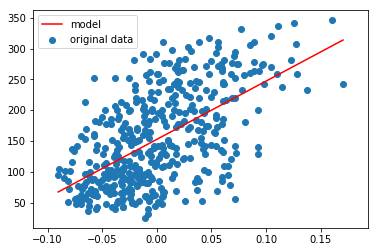

In [7]:
n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## 3. 如何可视化迭代过程

<IPython.core.display.Javascript object>


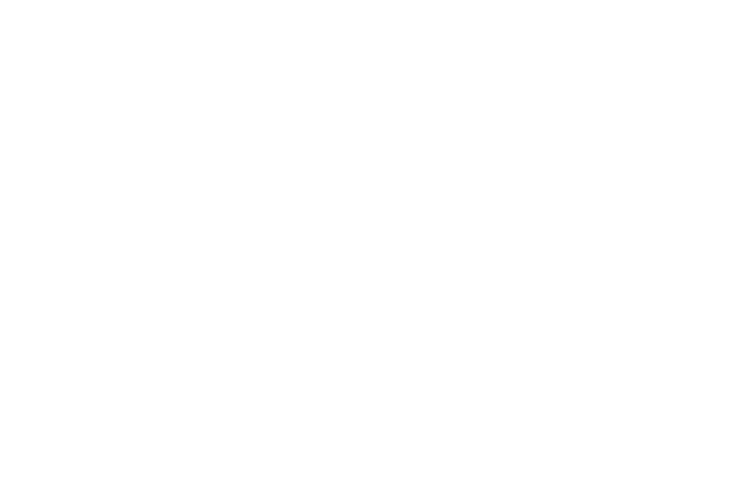

<IPython.core.display.Javascript object>


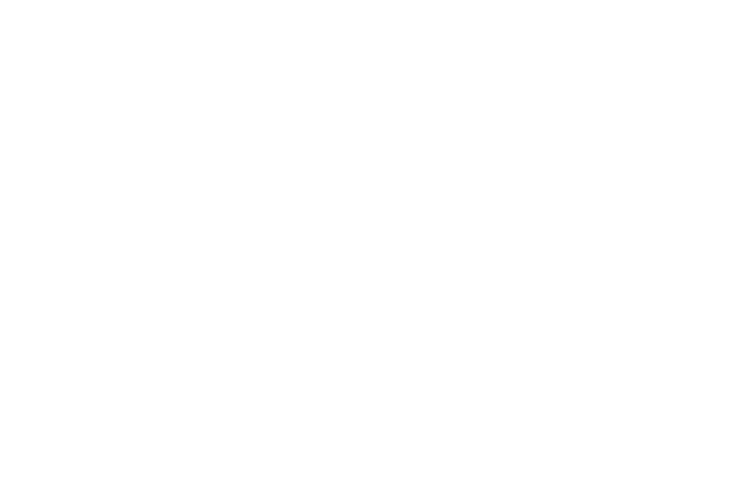

Traceback (most recent call last):
  File "/home/bushuhui/.virtualenv/dl/lib/python3.5/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/bushuhui/.virtualenv/dl/lib/python3.5/site-packages/matplotlib/animation.py", line 1462, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [10]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation

n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

fig = plt.figure()
imgs = []

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    #print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
    if i % 50 == 0:
        x_min = np.min(X)
        x_max = np.max(X)
        y_min = a * x_min + b
        y_max = a * x_max + b

        img = plt.scatter(X, Y, label='original data')
        img = plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
        imgs.append(img)
        
ani = animation.ArtistAnimation(fig, imgs)
plt.show()

## 4. 如何使用批次更新的方法？

如果有一些数据包含比较大的错误（异常数据），因此每次更新仅仅使用一个数据会导致不精确，同时每次仅仅使用一个数据来计算更新也导致计算效率比较低。


* [梯度下降方法的几种形式](https://blog.csdn.net/u010402786/article/details/51188876)

## 5. 如何拟合多项式函数？

需要设计一个弹道导弹防御系统，通过观测导弹的飞行路径，预测未来导弹的飞行轨迹，从而完成摧毁的任务。按照物理学，可以得知模型为:
$$
y = at^2 + bt + c
$$
我们需要求解三个模型参数$a, b, c$。

损失函数的定义为：
$$
L = \sum_{i=1}^N (y_i - at^2 - bt - c)^2
$$


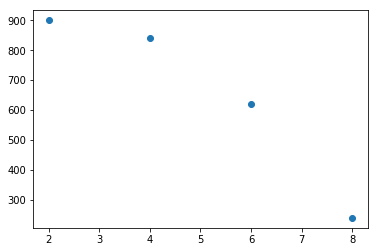

In [11]:
%matplotlib inline

t = np.array([2, 4, 6, 8])
#t = np.linspace(0, 10)

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc


plt.scatter(t, y)
plt.show()

### 5.1 如何得到更新项?

$$
L = \sum_{i=1}^N (y_i - at^2 - bt - c)^2
$$

\begin{eqnarray}
\frac{\partial L}{\partial a} & = & - 2\sum_{i=1}^N (y_i - at^2 - bt -c) t^2 \\
\frac{\partial L}{\partial b} & = & - 2\sum_{i=1}^N (y_i - at^2 - bt -c) t \\
\frac{\partial L}{\partial c} & = & - 2\sum_{i=1}^N (y_i - at^2 - bt -c)
\end{eqnarray}

## 6. 如何使用sklearn求解线性问题？


a = 949.435260, b = 152.133484


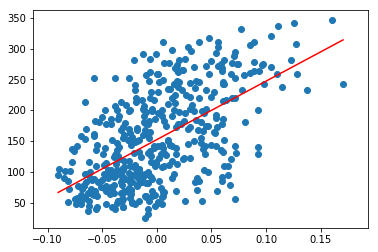

In [12]:
from sklearn import linear_model

# load data
d = datasets.load_diabetes()

X = d.data[:, np.newaxis, 2]
Y = d.target

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y)
plt.plot([x_min, x_max], [y_min, y_max], 'r')
plt.show()

## 7. 如何使用sklearn拟合多项式函数？

In [10]:
# Fitting polynomial functions

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

t = np.array([2, 4, 6, 8])

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(t[:, np.newaxis], y)
model.named_steps['linear'].coef_


array([800.,  90., -20.])